# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">لبه یابی با Canny</div>

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">اعمال لبه یابی canny روی یک تصویر</div>

Text(0.5, 1.0, 'Edge Image')

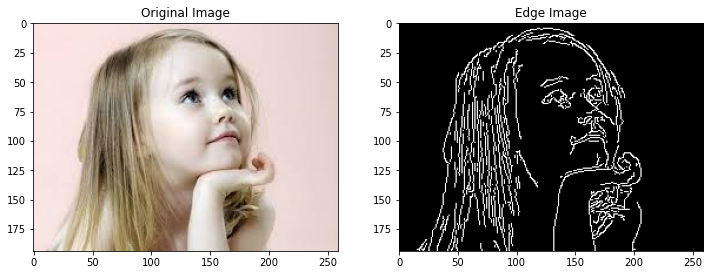

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[12,7])
src = cv2.imread("images/little_girl.jpg") 

edges = cv2.Canny(src,100,200)
plt.subplot(121),plt.imshow(src[...,::-1]);plt.title('Original Image')
plt.subplot(122),plt.imshow(edges,cmap = 'gray');plt.title('Edge Image')


### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تاثیر پارامتر ورودی تابع canny روی لبه ها</div>

In [2]:
import cv2
import numpy as np

max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'
ratio = 3
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv2.GaussianBlur(src_gray, (3,3), 0)
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv2.imshow(window_name, dst)
    
src = cv2.imread("images/little_girl.jpg")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cv2.namedWindow(window_name, cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv2.waitKey()
cv2.destroyAllWindows()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی یک تصویر دیگر</div>

In [3]:
max_lowThreshold = 100
window_name = 'Edge Map'
title_trackbar = 'Min Threshold:'

ratio = 3
kernel_size = 3
def CannyThreshold(val):
    low_threshold = val
    img_blur = cv2.GaussianBlur(src_gray, (3,3), 0)
    detected_edges = cv2.Canny(img_blur, low_threshold, low_threshold*ratio, kernel_size)
    mask = detected_edges != 0
    dst = src * (mask[:,:,None].astype(src.dtype))
    cv2.imshow(window_name, dst)
src = cv2.imread("images/plate2.jpg")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
cv2.namedWindow(window_name, cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar(title_trackbar, window_name , 0, max_lowThreshold, CannyThreshold)
CannyThreshold(0)
cv2.waitKey()
cv2.destroyAllWindows()

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">بررسی روی تصویر وبکم</div>

In [ ]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    src_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(src_gray,60,120)
    edges = cv2.bitwise_not(edges)
    cv2.imshow('Webcam', edges)    
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
# Release camera and close windows
cap.release()
cv2.destroyAllWindows()      

https://docs.opencv.org/4.x/da/d5c/tutorial_canny_detector.html